In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Utkarsh\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [20]:
#read file
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [44]:
messages

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [19]:
for message_id,message_text in enumerate(message[:10]):
    print(message_id)
    print('\n')
    print(message_text)

0


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1


ham	Ok lar... Joking wif u oni...
2


spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3


ham	U dun say so early hor... U c already then say...
4


ham	Nah I don't think he goes to usf, he lives around here though
5


spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6


ham	Even my brother is not like to speak with me. They treat me like aids patent.
7


ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8


spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim c

In [53]:
# Use pandas to read it and use names to assign column name
import pandas as pd
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [58]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [70]:
messages['length']= messages['message'].apply(len)



messages.head()

In [72]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
import seaborn as sns

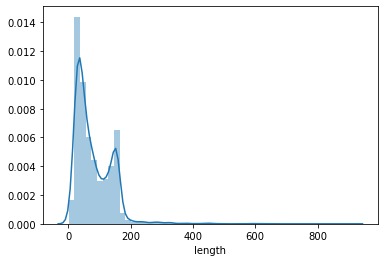

In [74]:
sns.distplot(messages['length'])

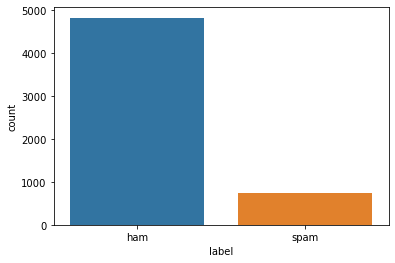

In [75]:
sns.countplot(messages['label'])

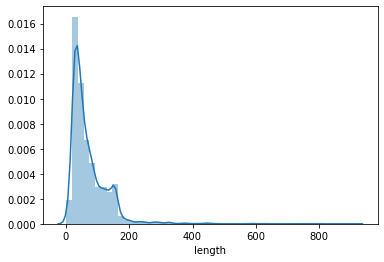

In [80]:
sns.distplot(messages[messages['label']=='ham']['length'])
# ham are shorter

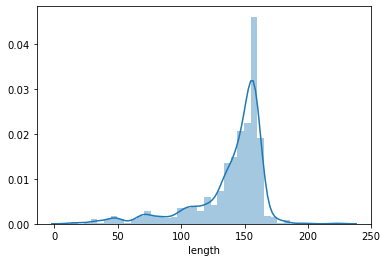

In [81]:
sns.distplot(messages[messages['label']!='ham']['length'])
#spam are long typically

In [108]:
# clean data
import string
from nltk.corpus import stopwords

In [123]:
# remove punctuations, stop / general words
def text_clean(mess):
    npunc = [char for char in mess if char not in string.punctuation]
    mess= ''.join(npunc) # join with space in between for list npunc
    mess = [word for word in mess.split() if word.lower() not in stopwords.words('english')] # convert mess to list and remove common words
    return mess

In [125]:
sample = 'hey there!! buddy'
sample = text_clean(sample)
sample

['hey', 'buddy']

In [126]:
# todo : stemming with nltk

In [135]:
#bagofwords
from sklearn.feature_extraction.text import CountVectorizer
bowTransformer = CountVectorizer(analyzer=text_clean).fit(messages['message'])

In [136]:
bowTransformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [137]:
#transform messages to bag of words
messages_bow = bowTransformer.transform(messages['message'])

In [154]:
#it is sparse matrix for words vs message for out messages set
messages_bow.nnz

50548

In [169]:
#sample to see 3rd row as bag of words in sparse matrix format
print(messages_bow[3])

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [178]:
#sample to see 2nd word in 3rd message
bowTransformer.get_feature_names()[4629]

'already'

In [179]:
#transform word counts to nomralized (word freq and inverse document freq)
from sklearn.feature_extraction.text import TfidfTransformer

In [180]:
tidfTransformer = TfidfTransformer().fit(messages_bow)

In [186]:
messages_tidf = tidfTransformer.transform(messages_bow)

In [187]:
#sample to see 3rd row as nomralized rather than word count as done above
print(tidfTransformer.transform(messages_bow)[3])

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [191]:
# Create Model using bayes
from sklearn.naive_bayes import MultinomialNB
spamDetectionModel = MultinomialNB()
spamDetectionModel.fit(messages_tidf,messages['label'])

MultinomialNB()

In [193]:
#predict
#sample to see precition on 3rd row in messages
spamDetectionModel.predict(tidfTransformer.transform(messages_bow)[3])

array(['ham'], dtype='<U4')

In [194]:
# USE PIPELINE TO DO ABOVE
#1. data clean -> remove punc and stop words
#2. generate bow (count vectorization) -> create bag of words for document
#3. nomralize vectors -> term freq and inverse document freq

In [195]:
#split test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.33, random_state=101)

In [196]:
from sklearn.pipeline import Pipeline
#create text_clean yourself

In [197]:
pipeline = Pipeline([
    ('bow_step', CountVectorizer(analyzer=text_clean)),
    ('tfidf_step',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [199]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow_step',
                 CountVectorizer(analyzer=<function text_clean at 0x0000024608332940>)),
                ('tfidf_step', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [200]:
pred = pipeline.predict(X_test)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix

In [207]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1624
        spam       1.00      0.67      0.81       215

    accuracy                           0.96      1839
   macro avg       0.98      0.84      0.89      1839
weighted avg       0.96      0.96      0.96      1839

[[1624    0]
 [  70  145]]


In [209]:
from sklearn.svm import SVC
pipeline2 = Pipeline([
    ('bow_step', CountVectorizer(analyzer=text_clean)),
    ('tfidf_step',TfidfTransformer()),
    ('classifier',SVC())
])
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('bow_step',
                 CountVectorizer(analyzer=<function text_clean at 0x0000024608332940>)),
                ('tfidf_step', TfidfTransformer()), ('classifier', SVC())])

In [210]:
pred2 = pipeline.predict(X_test)
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1624
        spam       1.00      0.67      0.81       215

    accuracy                           0.96      1839
   macro avg       0.98      0.84      0.89      1839
weighted avg       0.96      0.96      0.96      1839

[[1624    0]
 [  70  145]]
